<a href="https://www.kaggle.com/neslihanyetik/heart-stroke-prediction?scriptVersionId=86247698" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Introduction


Data vocabulary:

1. (age): age in years 
2. (sex): sex (1 = male; 0 = female) 
3. (cp): cp: chest pain type | Value 0: typical angina | Value 1: atypical angina | Value 2: non-anginal pain | Value 3: asymptomatic 
4. (trestbps): resting blood pressure (in mm Hg on admission to the hospital) 
5. (chol): serum cholestoral in mg/dl 
6. (fbs): (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false) 
7. (restecg): resting electrocardiographic results | Value 0: normal | Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV) | Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria 
8. (thalach): maximum heart rate achieved 
9. (exang): exercise induced angina (1 = yes; 0 = no) 
10. (oldpeak): ST depression induced by exercise relative to rest 
11. (slope): the slope of the peak exercise ST segment | Value 1: upsloping | Value 2: flat | Value 3: downsloping 
12. (ca): number of major vessels (0-3) colored by flourosopy 
13. (thal): 3 = normal; 6 = fixed defect; 7 = reversable defect 
14. (num) (the predicted attribute): Value 0: < 50% diameter narrowing | Value 1: > 50% diameter narrowing 

# Import esential Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# import hvplot.pandas
from scipy import stats

%matplotlib inline
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.options.display.float_format = "{:.3f}".format
#plt.rcParams["figure.figsize"] = (12,7)



# Ingest the data to notebook

In [2]:
df  = pd.read_csv("../input/heartdataset/heart.csv")
df.head()
# cp(göğüs agrısı tipi) ,restecg(dinlenme kardiografi sonuçları) ,slope(maxium egzersizde ST segmentinin eğilimi) , thal

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.300,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.500,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.400,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.800,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.600,2,0,2,1


Hastaların kalp hastalığı olup olmadığı içindeki özelliklere göre sınıflandırılan bir verimiz var. Bu verileri, bir hastanın bu hastalığa sahip olup olmadığını tahmin etmeye çalışan bir model oluşturmak için kullanmaya çalışacağız. 


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.shape

(303, 14)

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [7]:
df['cp']=df['cp'].replace({0:'typical angina',1:'atypical angina',2:'non-anginal pain',3:'asymptomatic'})

In [8]:
df['restecg']=df['restecg'].replace({0:'normal',1:'having ST-T wave abnormality',2:'left ventricular hypertrophy'})

In [9]:
df['slope']=df['slope'].replace({1:'upsloping',2:'flat',3:'downsloping'})

In [10]:
df['thal']=df['thal'].replace({3:'normal',6:'fixed defect',7:'reversable defect'})

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,asymptomatic,145,233,1,normal,150,0,2.300,0,0,1,1
1,37,1,non-anginal pain,130,250,0,having ST-T wave abnormality,187,0,3.500,0,0,2,1
2,41,0,atypical angina,130,204,0,normal,172,0,1.400,flat,0,2,1
3,56,1,atypical angina,120,236,0,having ST-T wave abnormality,178,0,0.800,flat,0,2,1
4,57,0,typical angina,120,354,0,having ST-T wave abnormality,163,1,0.600,flat,0,2,1


In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200
ca,303.000,0.729,1.023,0.000,0.000,0.000,1.000,4.000
target,303.000,0.545,0.499,0.000,0.000,1.000,1.000,1.000


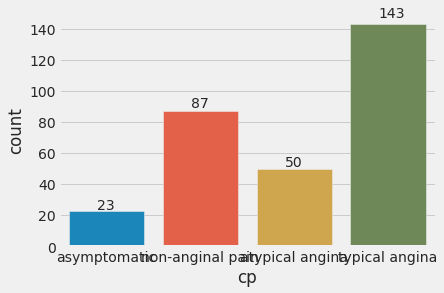

In [13]:
ax = sns.countplot(df.cp)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

In [14]:
df.target.value_counts(normalize=True)

1   0.545
0   0.455
Name: target, dtype: float64

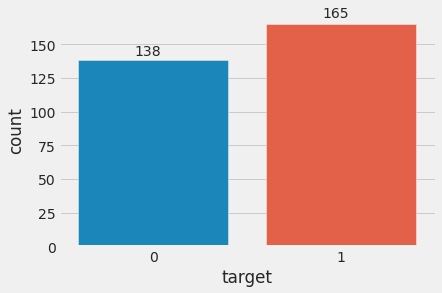

In [15]:
ax = sns.countplot(df['target'])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.3, p.get_height() * 1.03));

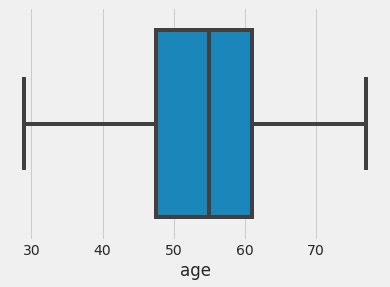

In [16]:
sns.boxplot(df.age);

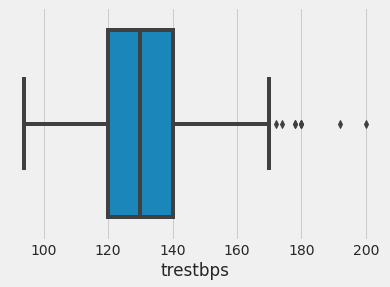

In [17]:
sns.boxplot(df.trestbps); # dinlenme kan basıncı

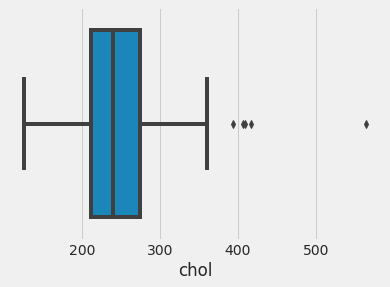

In [18]:
sns.boxplot(df.chol);

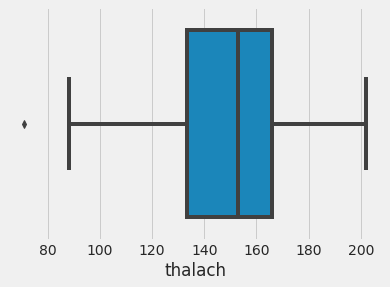

In [19]:
sns.boxplot(df.thalach);  # max kalp atışı

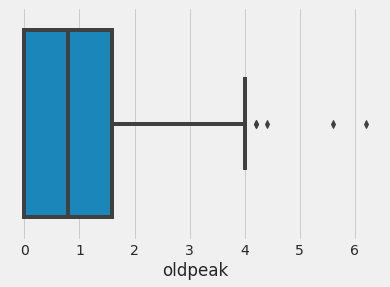

In [20]:
sns.boxplot(df.oldpeak);  # egzersize bağlı st depresyonu

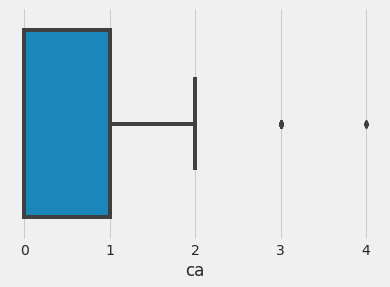

In [21]:
sns.boxplot(df.ca);  # büyük kan damar sayısı

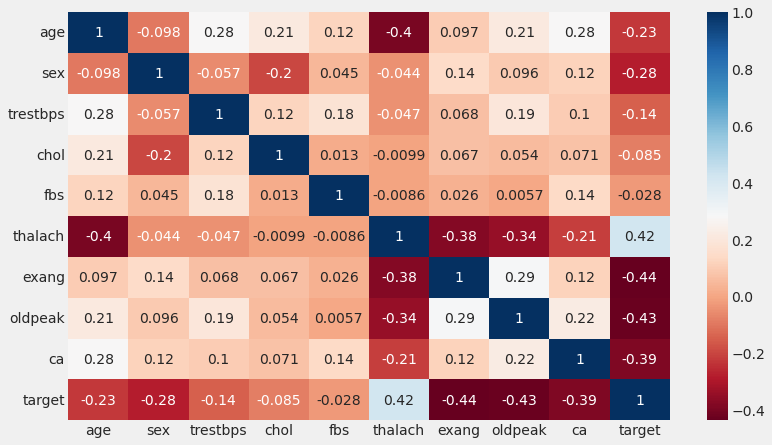

In [22]:
plt.rcParams["figure.figsize"] = (12,7)
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='RdBu');

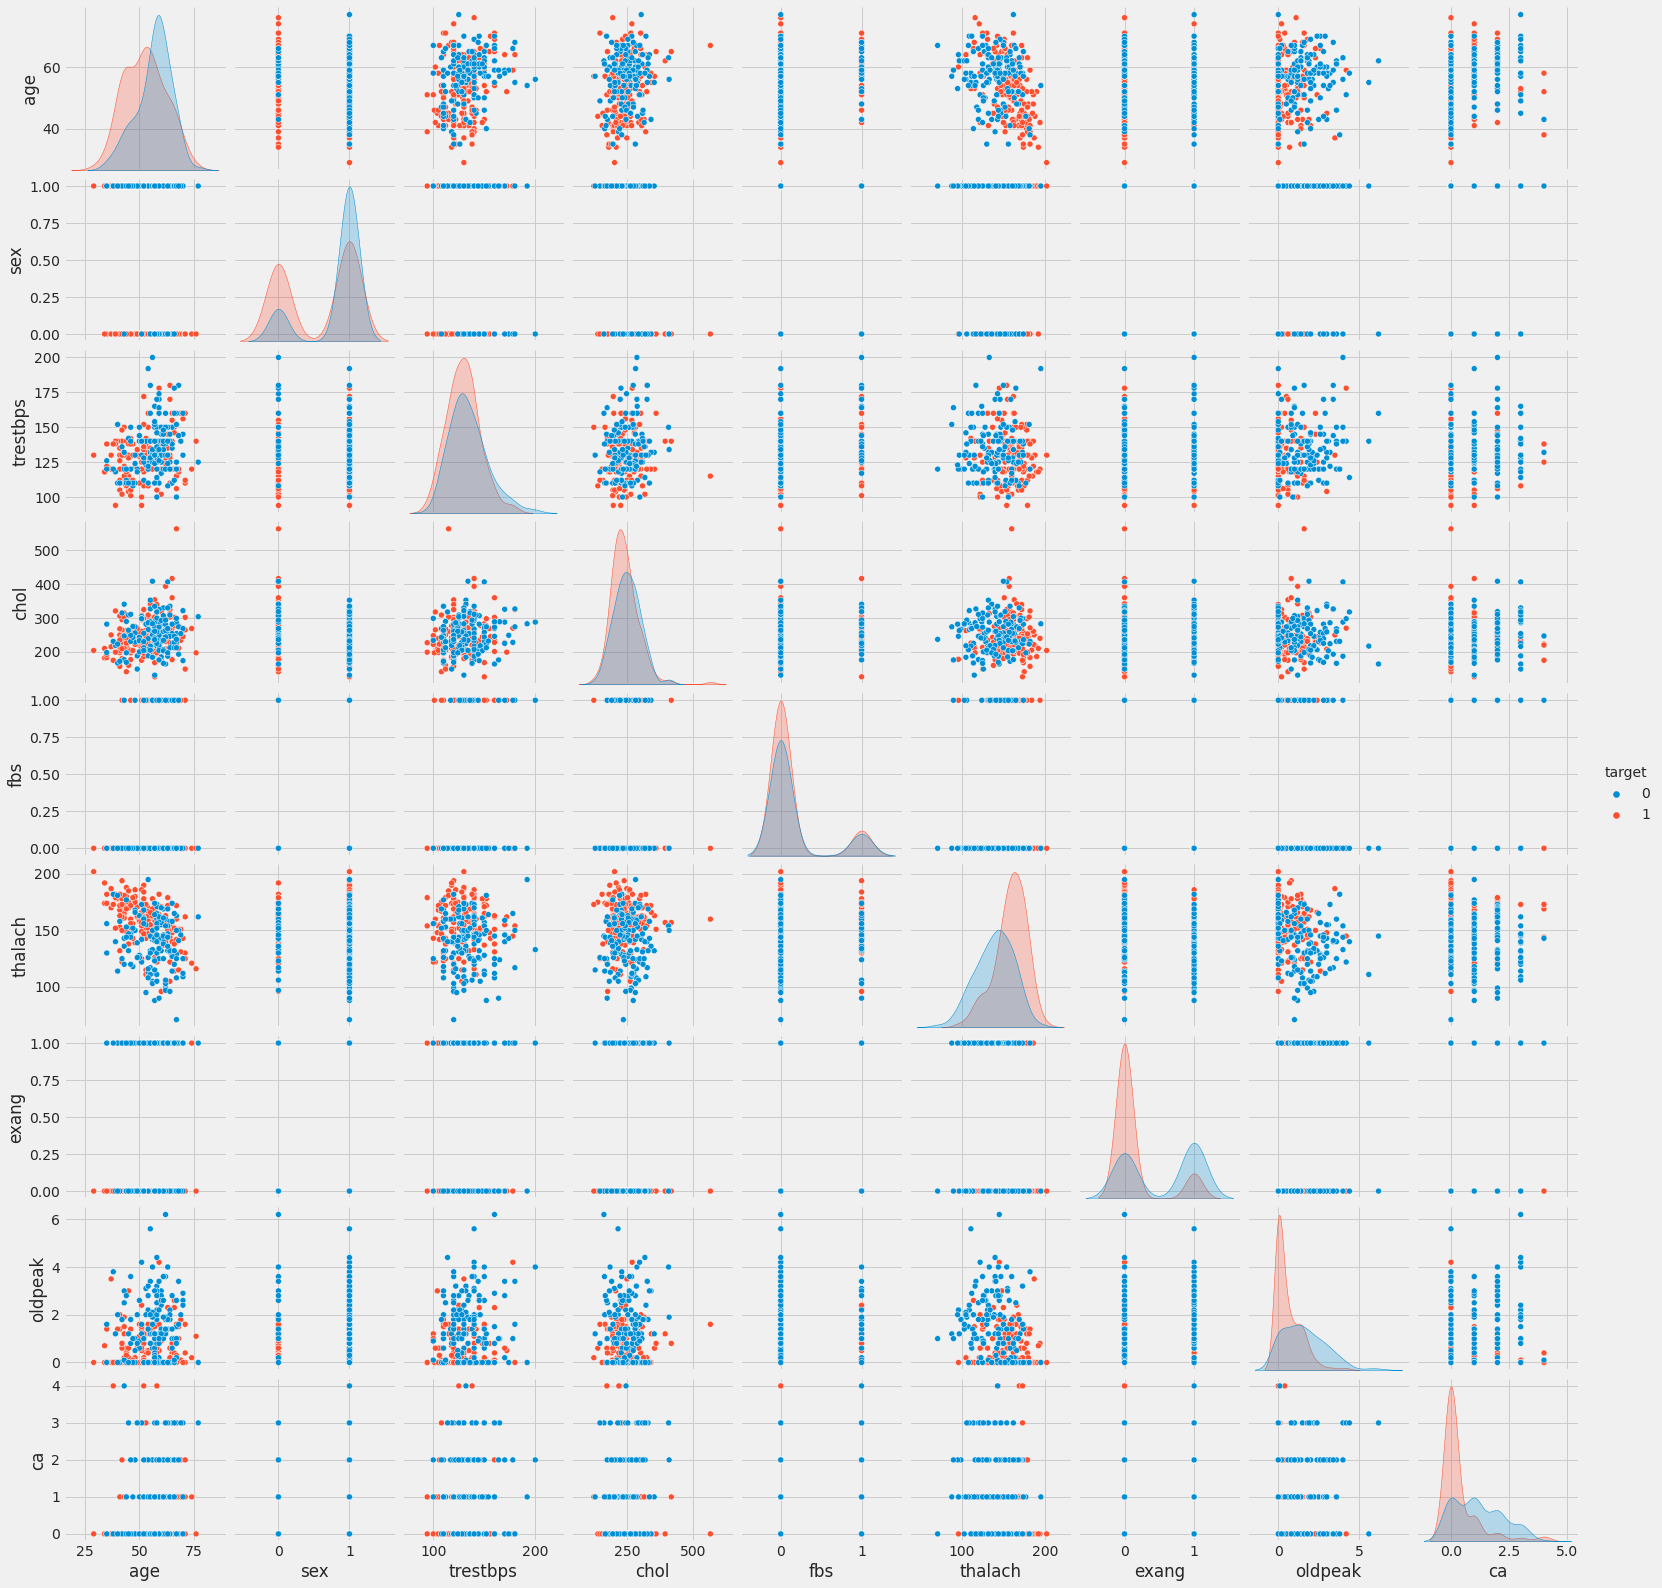

In [23]:
sns.pairplot(df.select_dtypes(include='number'),hue='target'); 

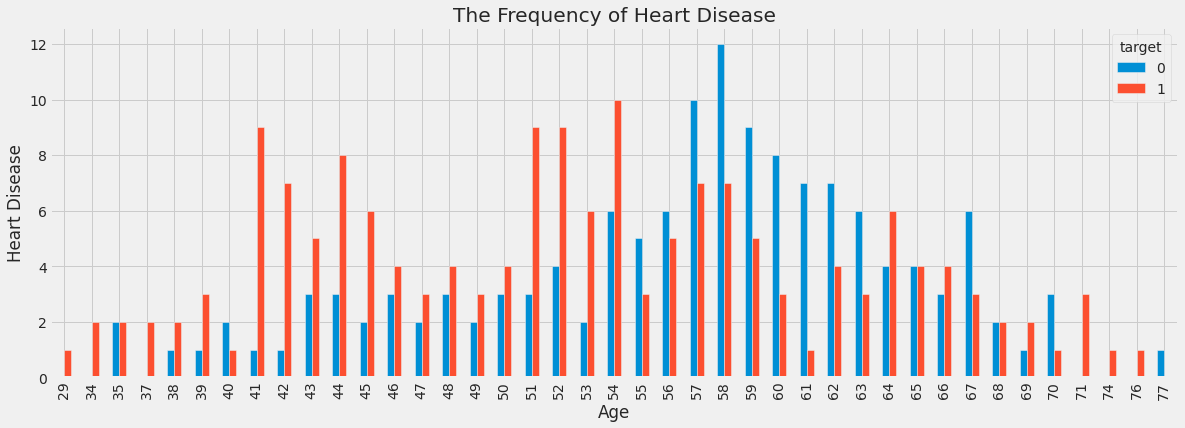

In [24]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(18,6))
plt.title('The Frequency of Heart Disease')
plt.xlabel('Age')
plt.ylabel('Heart Disease')
plt.show()

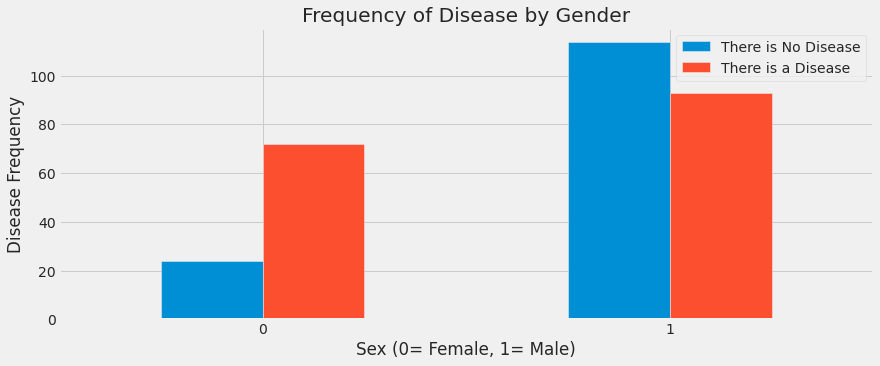

In [25]:
pd.crosstab(df.sex,df.target).plot(kind="bar",figsize=(13,5))
plt.title('Frequency of Disease by Gender')
plt.xlabel('Sex (0= Female, 1= Male)')
plt.xticks(rotation=0)
plt.legend(["There is No Disease", "There is a Disease"])
plt.ylabel('Disease Frequency')
plt.show()

# Data Preprocessing

In [26]:
df=pd.get_dummies(df,drop_first=True)


In [27]:
df.head()

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,target,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
0,63,1,145,233,1,150,0,2.300,0,1,0,0,0,0,1,0,0,1,0,0
1,37,1,130,250,0,187,0,3.500,0,1,0,1,0,0,0,0,0,0,1,0
2,41,0,130,204,0,172,0,1.400,0,1,1,0,0,0,1,1,0,0,1,0
3,56,1,120,236,0,178,0,0.800,0,1,1,0,0,0,0,1,0,0,1,0
4,57,0,120,354,0,163,1,0.600,0,1,0,0,1,0,0,1,0,0,1,0


In [28]:
X=df.drop(["target"], axis=1)
y=df["target"]

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,stratify=y, random_state=5)

In [30]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = MinMaxScaler()

In [31]:
X_train_scaled = scaler.fit_transform(X_train)

In [32]:
X_test_scaled = scaler.transform(X_test)

# Implement Logistic Regression and Evaluate

In [33]:
from sklearn.linear_model import LogisticRegression


In [34]:
log_model = LogisticRegression()

In [35]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [36]:
y_pred=log_model.predict(X_test_scaled)

In [37]:
y_pred_proba = log_model.predict_proba(X_test_scaled)

In [38]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal,target,pred,pred_proba
59,57,0,128,303,0,159,0,0.000,1,0,...,0,1,1,0,0,1,0,1,1,0.719
87,46,1,101,197,1,156,0,0.000,0,1,...,0,0,1,0,0,0,1,1,1,0.832
105,68,0,120,211,0,115,0,1.500,0,0,...,0,1,0,1,0,1,0,1,1,0.907
148,44,1,120,226,0,169,0,0.000,0,0,...,0,0,1,0,0,1,0,1,1,0.961
167,62,0,140,268,0,160,0,3.600,2,0,...,0,1,0,0,0,1,0,0,0,0.404
277,57,1,124,261,0,141,0,0.300,0,1,...,0,0,1,0,0,0,1,0,1,0.764
160,56,1,120,240,0,169,0,0.000,0,1,...,0,0,0,0,0,1,0,1,1,0.903
170,56,1,130,256,1,142,1,0.600,1,0,...,0,1,0,1,1,0,0,0,0,0.500
34,51,1,125,213,0,125,1,1.400,1,0,...,0,1,1,0,0,1,0,1,1,0.619
169,53,1,140,203,1,155,1,3.100,0,0,...,0,1,0,0,0,0,1,0,0,0.090


## Model Performance

In [39]:
from sklearn.metrics import confusion_matrix, classification_report


In [40]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [41]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)  


Test_Set
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Train_Set
[[ 79  18]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.85      0.87      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



### Cross Validate

In [42]:
from sklearn.model_selection import cross_validate


In [43]:
model = LogisticRegression()

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.011,0.003,0.750,0.750,0.750,0.727
2,0.009,0.003,0.714,0.833,0.769,0.727
3,0.009,0.003,0.800,0.727,0.762,0.762
4,0.009,0.003,0.833,0.909,0.870,0.857
5,0.009,0.003,0.889,0.727,0.800,0.810
6,0.010,0.003,0.818,0.818,0.818,0.810
7,0.009,0.003,0.900,0.818,0.857,0.857
8,0.010,0.003,0.846,0.917,0.880,0.857
9,0.010,0.003,0.923,1.000,0.960,0.952
10,0.008,0.004,0.857,1.000,0.923,0.905


In [44]:
df_scores.mean()[2:]     #  accuracy:0.81 

test_precision   0.833
test_recall      0.850
test_f1          0.839
test_accuracy    0.826
dtype: float64

In [45]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91


Train_Set
[[ 79  18]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.84      0.81      0.83        97
           1       0.85      0.87      0.86       115

    accuracy                           0.84       212
   macro avg       0.84      0.84      0.84       212
weighted avg       0.84      0.84      0.84       212



Even though our test scores are a little bit lower than the training scores, cross validation shows that there is no problem with the model. Also, since our target label is not so unbalanced, we can use the accuracy score as the referencing value.



### GridSearchCV

In [46]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [47]:
C = np.logspace(-1, 5, 20)
C

array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05])

In [48]:
from sklearn.model_selection import GridSearchCV

model = LogisticRegression()

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 
solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"penalty" : penalty,
              "C" : [C,1],
              "class_weight":class_weight,
              "solver":solver}


grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=10,
                          scoring = 'accuracy',       
                          n_jobs = -1)

In [49]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                               1],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='accuracy')

In [50]:
grid_model.best_params_

{'C': 1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [51]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)  # 0.81------->0.82

Test_Set
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Train_Set
[[82 15]
 [17 98]]
              precision    recall  f1-score   support

           0       0.83      0.85      0.84        97
           1       0.87      0.85      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [52]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

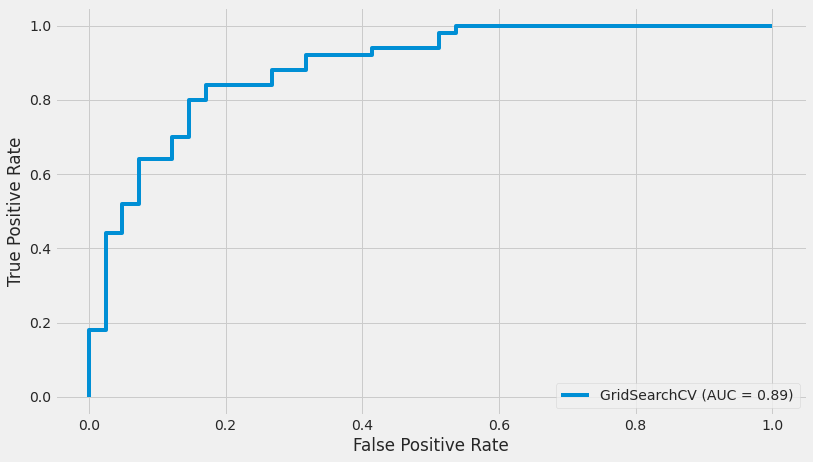

In [53]:
plot_roc_curve(grid_model, X_test_scaled, y_test) 

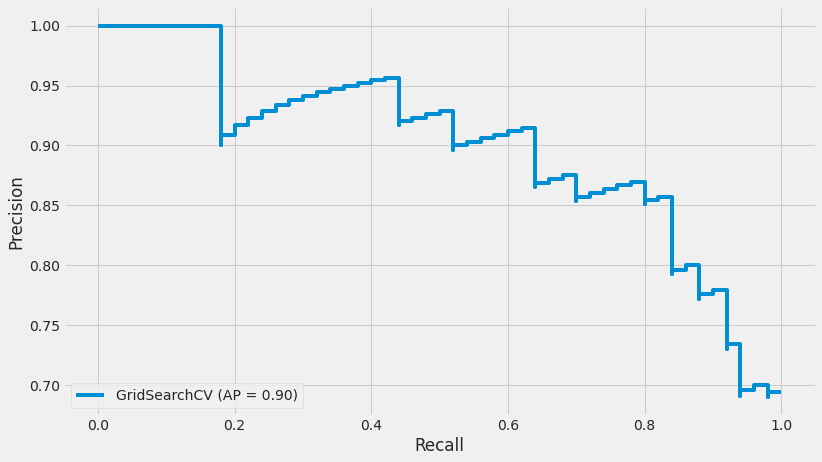

In [54]:
plot_precision_recall_curve(grid_model, X_test_scaled, y_test);

####  log_model final  Accuracy Score:0.82 ------------->16 hatalı tahmin

# Implement KNN and Evaluate

In [55]:
from sklearn.neighbors import KNeighborsClassifier


In [56]:
knn = KNeighborsClassifier()

In [57]:
knn.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [58]:
knn_pred = knn.predict(X_test_scaled)

In [59]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test) 

Test_Set
[[33  8]
 [11 39]]
              precision    recall  f1-score   support

           0       0.75      0.80      0.78        41
           1       0.83      0.78      0.80        50

    accuracy                           0.79        91
   macro avg       0.79      0.79      0.79        91
weighted avg       0.79      0.79      0.79        91


Train_Set
[[ 85  12]
 [ 13 102]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        97
           1       0.89      0.89      0.89       115

    accuracy                           0.88       212
   macro avg       0.88      0.88      0.88       212
weighted avg       0.88      0.88      0.88       212



### Model Performance on Classification Tests

In [60]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix


In [61]:
confusion_matrix(y_test, y_pred)


array([[32,  9],
       [ 8, 42]])

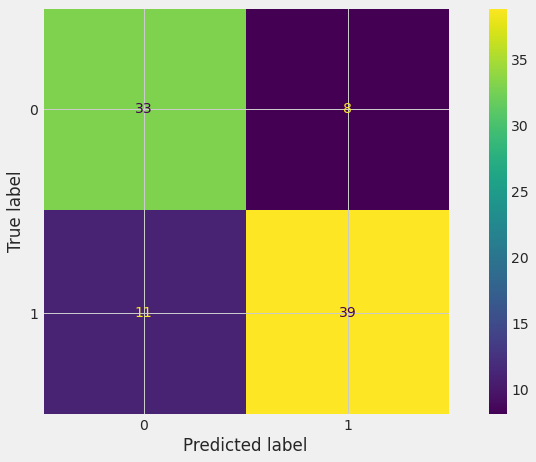

In [62]:
plot_confusion_matrix(knn, X_test_scaled, y_test);


In [63]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[32  9]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91



### Elbow Method for Choosing Reasonable K Values


In [64]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score


In [65]:
test_error_rates = []


for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled,y_train) 
   
    y_pred_test = knn_model.predict(X_test_scaled)
    
    test_error = 1 - accuracy_score(y_test,y_pred_test) # hatayı buluyoruz.
    test_error_rates.append(test_error)

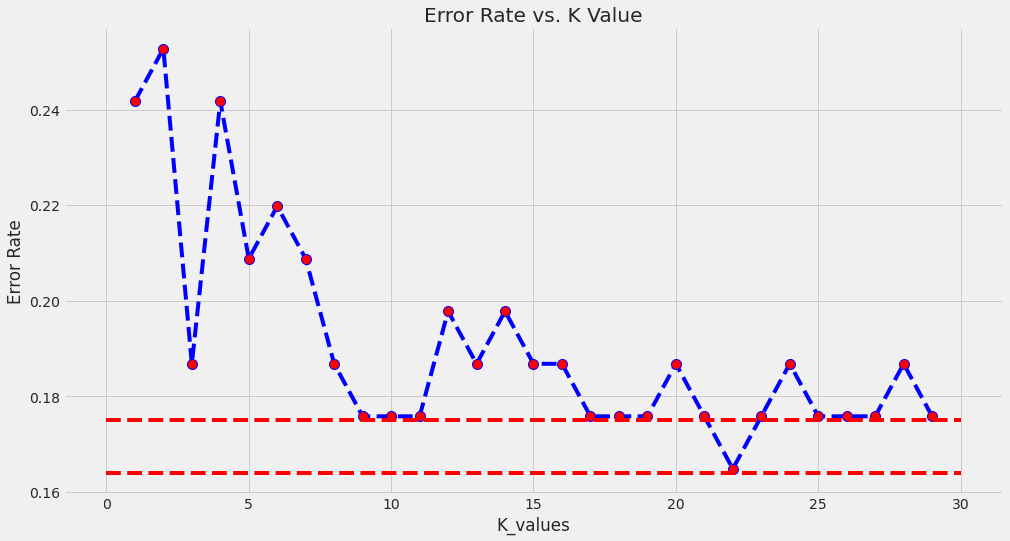

In [66]:
plt.figure(figsize=(15,8))
plt.plot(range(1,30), test_error_rates, color='blue', linestyle='--', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K_values')
plt.ylabel('Error Rate')
plt.hlines(y=0.164, xmin = 0, xmax = 30, colors= 'r', linestyles="--")
plt.hlines(y=0.175, xmin = 0, xmax = 30, colors= 'r', linestyles="--")

### Scores by Various K Values

In [67]:
knn = KNeighborsClassifier(n_neighbors=9)  # accuracy:0.82 -------> 16 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=9\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)  # en yakın 9 komsuya bakıyoruz.

WITH K=9

Test_Set
[[33  8]
 [ 8 42]]
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91


Train_Set
[[ 82  15]
 [ 15 100]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85        97
           1       0.87      0.87      0.87       115

    accuracy                           0.86       212
   macro avg       0.86      0.86      0.86       212
weighted avg       0.86      0.86      0.86       212



In [68]:
knn = KNeighborsClassifier(n_neighbors=22)   # accuracy:0.84 -------> 15 hatalı tahmin

knn.fit(X_train_scaled,y_train)
print('WITH K=22\n')
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test) # en yakın 22 komsuya bakıyoruz.

WITH K=22

Test_Set
[[32  9]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Cross Validate

In [69]:
model = KNeighborsClassifier()  

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores

,fit_time,score_time,test_precision,test_recall,test_f1,test_accuracy
1,0.001,0.005,0.750,0.750,0.750,0.727
2,0.001,0.005,0.769,0.833,0.800,0.773
3,0.001,0.005,0.875,0.636,0.737,0.762
4,0.001,0.004,0.909,0.909,0.909,0.905
5,0.001,0.004,0.909,0.909,0.909,0.905
6,0.001,0.005,0.900,0.818,0.857,0.857
7,0.001,0.005,0.900,0.818,0.857,0.857
8,0.001,0.004,0.846,0.917,0.880,0.857
9,0.001,0.005,0.786,0.917,0.846,0.810
10,0.001,0.005,0.846,0.917,0.880,0.857


In [70]:
df_scores.mean()[2:]        # accuracy:0.82

test_precision   0.849
test_recall      0.842
test_f1          0.843
test_accuracy    0.831
dtype: float64

In [71]:
eval_metric(knn, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[32  9]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Gridsearch Method for Choosing Reasonable K Values

In [72]:
knn_grid = KNeighborsClassifier()

In [73]:
k_values= range(1,30)

In [74]:
param_grid = {"n_neighbors":k_values}

In [75]:
knn_grid_model = GridSearchCV(knn_grid, param_grid, cv=10, scoring= 'accuracy')

In [76]:
knn_grid_model.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30)}, scoring='accuracy')

In [77]:
knn_grid_model.best_params_

{'n_neighbors': 18}

In [78]:
print('WITH K=18\n')
eval_metric(knn_grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

WITH K=18

Test_Set
[[31 10]
 [ 6 44]]
              precision    recall  f1-score   support

           0       0.84      0.76      0.79        41
           1       0.81      0.88      0.85        50

    accuracy                           0.82        91
   macro avg       0.83      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91


Train_Set
[[83 14]
 [18 97]]
              precision    recall  f1-score   support

           0       0.82      0.86      0.84        97
           1       0.87      0.84      0.86       115

    accuracy                           0.85       212
   macro avg       0.85      0.85      0.85       212
weighted avg       0.85      0.85      0.85       212



### Evaluating ROC Curves and AUC

In [79]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve

In [80]:
knn_model = KNeighborsClassifier(n_neighbors=9).fit(X_train_scaled, y_train)

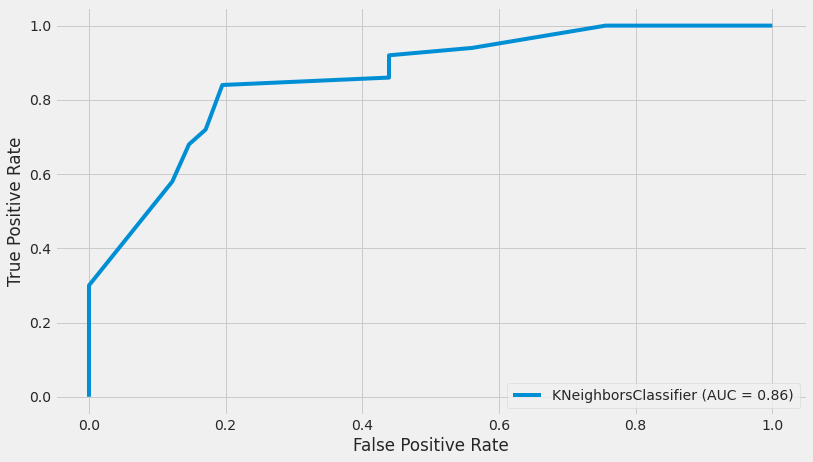

In [81]:
plot_roc_curve(knn_model, X_test_scaled, y_test)

In [82]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)
roc_auc_score(y_test, y_pred_proba[:,1])

0.8590243902439024

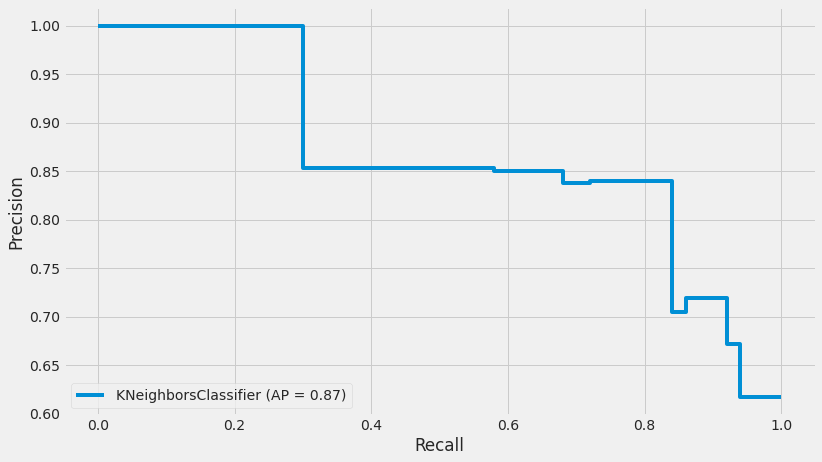

In [83]:
plot_precision_recall_curve(knn_model, X_test_scaled, y_test);

# Visually compare models based on your chosen metric

#### Logistic Regression with parameters found in the GridSearch and 0.5 as the optimal threshold

In [84]:
model = LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga')
# CV(10, model, pd.DataFrame(X_train_scaled), y_train, 0.5)

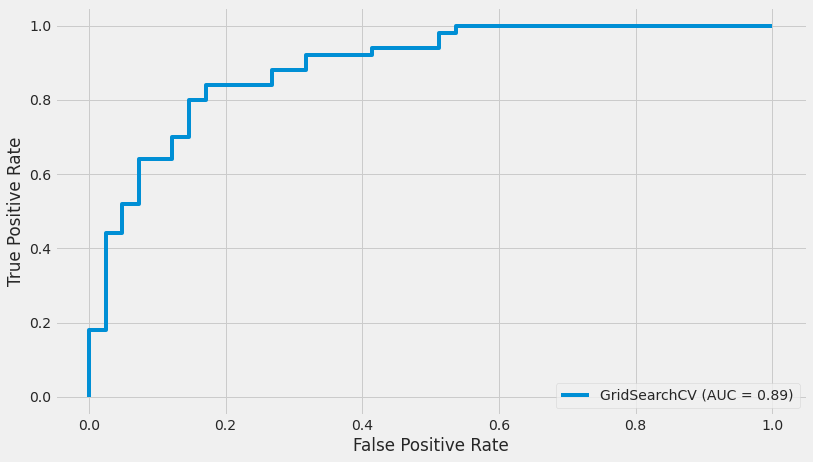

In [85]:
plot_roc_curve(grid_model, X_test_scaled, y_test);


#### KNN with k=12

In [86]:
model = KNeighborsClassifier(n_neighbors=12)

scores = cross_validate(model, X_train_scaled, y_train, scoring = ['accuracy', 'precision','recall',
                                                                   'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy    0.831
test_precision   0.865
test_recall      0.814
test_f1          0.834
dtype: float64

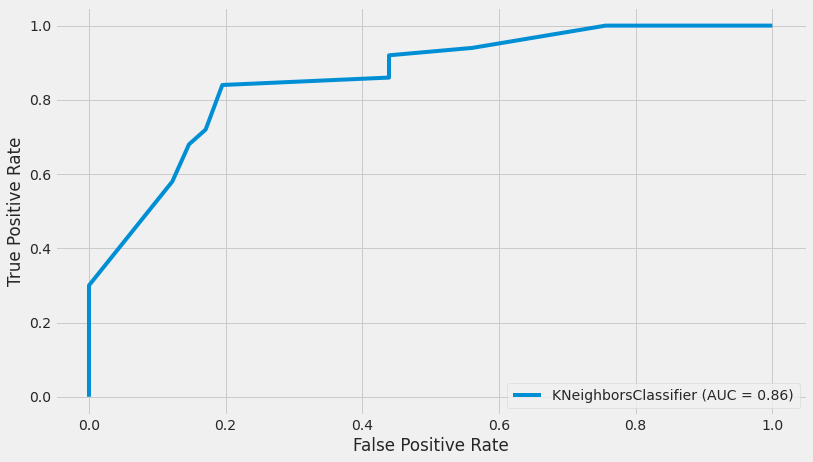

In [87]:
plot_roc_curve(knn_model, X_test_scaled, y_test);


I choose to continue with logistic regression.



# Chose best model and make a random prediction 

In [88]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.000,54.366,9.082,29.000,47.500,55.000,61.000,77.000
sex,303.000,0.683,0.466,0.000,0.000,1.000,1.000,1.000
trestbps,303.000,131.624,17.538,94.000,120.000,130.000,140.000,200.000
chol,303.000,246.264,51.831,126.000,211.000,240.000,274.500,564.000
fbs,303.000,0.149,0.356,0.000,0.000,0.000,0.000,1.000
thalach,303.000,149.647,22.905,71.000,133.500,153.000,166.000,202.000
exang,303.000,0.327,0.470,0.000,0.000,0.000,1.000,1.000
oldpeak,303.000,1.040,1.161,0.000,0.000,0.800,1.600,6.200
ca,303.000,0.729,1.023,0.000,0.000,0.000,1.000,4.000
target,303.000,0.545,0.499,0.000,0.000,1.000,1.000,1.000


In [89]:
scaler = MinMaxScaler()

In [90]:
scaler.fit(X)

MinMaxScaler()

In [91]:
X_scaled = scaler.transform(X)

### For Logistic Regression

In [92]:
final_log_model =  LogisticRegression(C= 0.1, class_weight= None,penalty= 'l1',solver= 'saga')

In [93]:
a = X.sample(5)

In [94]:
new_obs = a.to_dict()
new_obs

{'age': {178: 43, 85: 67, 254: 59, 125: 34, 180: 55},
 'sex': {178: 1, 85: 0, 254: 1, 125: 0, 180: 1},
 'trestbps': {178: 120, 85: 115, 254: 160, 125: 118, 180: 132},
 'chol': {178: 177, 85: 564, 254: 273, 125: 210, 180: 353},
 'fbs': {178: 0, 85: 0, 254: 0, 125: 0, 180: 0},
 'thalach': {178: 120, 85: 160, 254: 125, 125: 192, 180: 132},
 'exang': {178: 1, 85: 0, 254: 0, 125: 0, 180: 1},
 'oldpeak': {178: 2.5, 85: 1.6, 254: 0.0, 125: 0.7, 180: 1.2},
 'ca': {178: 0, 85: 0, 254: 0, 125: 0, 180: 1},
 'cp_atypical angina': {178: 0, 85: 0, 254: 0, 125: 1, 180: 0},
 'cp_non-anginal pain': {178: 0, 85: 1, 254: 0, 125: 0, 180: 0},
 'cp_typical angina': {178: 1, 85: 0, 254: 0, 125: 0, 180: 1},
 'restecg_left ventricular hypertrophy': {178: 0,
  85: 0,
  254: 0,
  125: 0,
  180: 0},
 'restecg_normal': {178: 1, 85: 1, 254: 1, 125: 0, 180: 0},
 'slope_flat': {178: 0, 85: 0, 254: 1, 125: 1, 180: 0},
 'slope_upsloping': {178: 1, 85: 1, 254: 0, 125: 0, 180: 1},
 'thal_1': {178: 0, 85: 0, 254: 0, 125: 

In [95]:
samples = pd.DataFrame(new_obs)
samples

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,cp_non-anginal pain,cp_typical angina,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal
178,43,1,120,177,0,120,1,2.500,0,0,0,1,0,1,0,1,0,0,1
85,67,0,115,564,0,160,0,1.600,0,0,1,0,0,1,0,1,0,0,1
254,59,1,160,273,0,125,0,0.000,0,0,0,0,0,1,1,0,0,1,0
125,34,0,118,210,0,192,0,0.700,0,1,0,0,0,0,1,0,0,1,0
180,55,1,132,353,0,132,1,1.200,1,0,0,1,0,0,0,1,0,0,1


In [96]:
samples_scaled = scaler.transform(samples)
samples_scaled

array([[0.29166667, 1.        , 0.24528302, 0.11643836, 0.        ,
        0.3740458 , 1.        , 0.40322581, 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.79166667, 0.        , 0.19811321, 1.        , 0.        ,
        0.67938931, 0.        , 0.25806452, 0.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        ],
       [0.625     , 1.        , 0.62264151, 0.33561644, 0.        ,
        0.41221374, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        , 0.        , 1.        , 0.        ],
       [0.10416667, 0.        , 0.22641509, 0.19178082, 0.        ,
        0.92366412, 0.        , 0.11290323, 0.        , 1.        ,
        0.        , 0.        , 0.        , 0.        , 1.        ,
        0.   

In [97]:
final_log_model.fit(X_scaled,y)

LogisticRegression(C=0.1, penalty='l1', solver='saga')

In [98]:
predictions = final_log_model.predict(samples_scaled)
predictions_proba = final_log_model.predict_proba(samples_scaled)


In [99]:
samples["pred"] = predictions
samples["pred_proba_1"] = predictions_proba[:,1]
samples["pred_proba_0"] = predictions_proba[:,0]
samples

# predictions are according to 0.5 threshold

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,restecg_left ventricular hypertrophy,restecg_normal,slope_flat,slope_upsloping,thal_1,thal_2,thal_normal,pred,pred_proba_1,pred_proba_0
178,43,1,120,177,0,120,1,2.500,0,0,...,0,1,0,1,0,0,1,0,0.181,0.819
85,67,0,115,564,0,160,0,1.600,0,0,...,0,1,0,1,0,0,1,0,0.498,0.502
254,59,1,160,273,0,125,0,0.000,0,0,...,0,1,1,0,0,1,0,1,0.836,0.164
125,34,0,118,210,0,192,0,0.700,0,1,...,0,0,1,0,0,1,0,1,0.844,0.156
180,55,1,132,353,0,132,1,1.200,1,0,...,0,0,0,1,0,0,1,0,0.181,0.819


### For KNN

In [100]:
final_knn_model = KNeighborsClassifier(n_neighbors=12)

In [101]:
final_knn_model.fit(X_scaled,y)

KNeighborsClassifier(n_neighbors=12)

In [102]:
predictions = final_knn_model.predict(samples_scaled)
predictions_proba = final_knn_model.predict_proba(samples_scaled)


In [103]:
samples["pred_KNN"] = predictions
samples["pred_proba_1_KNN"] = predictions_proba[:,1]
samples["pred_proba_0_KNN"] = predictions_proba[:,0]
samples


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,ca,cp_atypical angina,...,slope_upsloping,thal_1,thal_2,thal_normal,pred,pred_proba_1,pred_proba_0,pred_KNN,pred_proba_1_KNN,pred_proba_0_KNN
178,43,1,120,177,0,120,1,2.500,0,0,...,1,0,0,1,0,0.181,0.819,0,0.000,1.000
85,67,0,115,564,0,160,0,1.600,0,0,...,1,0,0,1,0,0.498,0.502,0,0.500,0.500
254,59,1,160,273,0,125,0,0.000,0,0,...,0,0,1,0,1,0.836,0.164,1,0.833,0.167
125,34,0,118,210,0,192,0,0.700,0,1,...,0,0,1,0,1,0.844,0.156,1,1.000,0.000
180,55,1,132,353,0,132,1,1.200,1,0,...,1,0,0,1,0,0.181,0.819,0,0.083,0.917


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py", line 443, in _check_solver
    "got %s penalty." % (solver, penalty))
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:552: FitFailedWarning: Estimator fit failed. The score on this train-test partition for